# Churn Prediction

Source    : https://www.dqlab.id/

Typed by  : Aulia Khalqillah

Case     : Predict the customers churn in past 6 months.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Load data

In [2]:
df = pd.read_csv('data_retail.csv',sep=';')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


## Exploratory Data Analysis

The data type of columns of First_Transaction and Last_Transaction are int64. This type have to be converted to date format.

In [4]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


To identify the customers churn, we have to check the past 6 months of their transaction. We can get this information from the last transaction date from the whole data.

In [5]:
df['Last_Transaction'].max()

Timestamp('2019-02-01 23:57:57.286000013')

The last transaction has recorded in this data that is on 2019-02-01. We can identify, the past 6 months from that time is on 2018-08-01. That means, we have to classify the customers who still transaction above 2018-08-01 (not churn/False) and the customers who didn't transaction from 2018-08-01 to the 2019-02-01 (churn/True).

In [6]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


Remove unecessary features 

In [7]:
del df['no']
del df['Row_Num']

Check missing value

In [8]:
df.isnull().sum()

Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
is_churn                      0
dtype: int64

The missing value is not exists in this data

We calculate the number of customers transaction for each year

In [9]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018


Plot the number of customers at first transaction and last transaction for each year

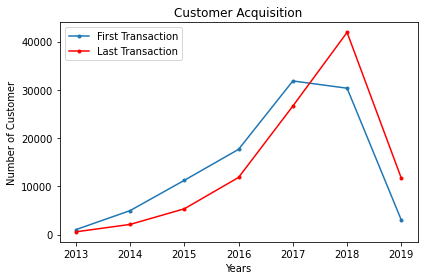

In [10]:
df_first_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_last_year = df.groupby(['Year_Last_Transaction'])['Customer_ID'].count()
df_first_year.plot(
    x='Year_First_Transaction',
    y='Customer_ID',
    kind='line',
    marker='.',
    title='Customer Acquisition',
    label='First Transaction'
    )

df_last_year.plot(
    x='Year_Last_Transaction',
    y='Customer_ID',
    kind='line',
    marker='.',
    title='Customer Acquisition',
    color='red', 
    label='Last Transaction'
    )
plt.ylabel('Number of Customer')
plt.xlabel('Years')
plt.legend()
plt.tight_layout()
plt.show()

The number of customers of the last transaction from 2013 to 2017 are lower than to the first transaction. However, in 2017 to 2018, the number of customers of the last transaction are increase significantly, but it was going down in 2018 to 2019. Unfortunately, in 2017 to 2019 the number of customers was going down of the first transaction.

Calculate number of total transaction each year

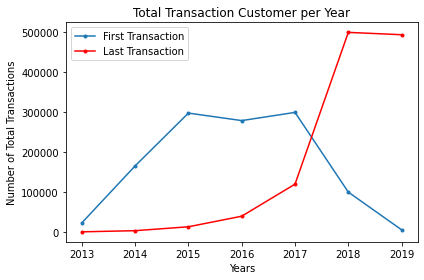

In [11]:
df_first_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_last_year = df.groupby(['Year_Last_Transaction'])['Count_Transaction'].sum()

df_first_year.plot(
    x='Year_First_Transaction',
    y='Count_Transaction',
    kind='line',
    marker='.',
    title='Total Transaction Customer per Year',
    label='First Transaction'
    )
df_last_year.plot(x='Year_Last_Transaction',
y='Count_Transaction', 
kind='line', 
marker='.',
title='Total Transaction Customer per Year', 
label='Last Transaction', 
color='red')

plt.xlabel('Years')
plt.ylabel('Number of Total Transactions')
plt.legend()
plt.tight_layout()
plt.show()

The number of total transactions of the first transaction in 2013 to 2017 are higher than to the last transaction where its number of total transactions are lower. In 2017 to 2018, the number of total transactions were growing up significantly for the last transaction. However, in 2018 to 2019 this numbers were going down slowly. Unfortunately, for number of transactions of the first transaction were going down significantly in 2017 to 2019.

Average transaction for each sold product 

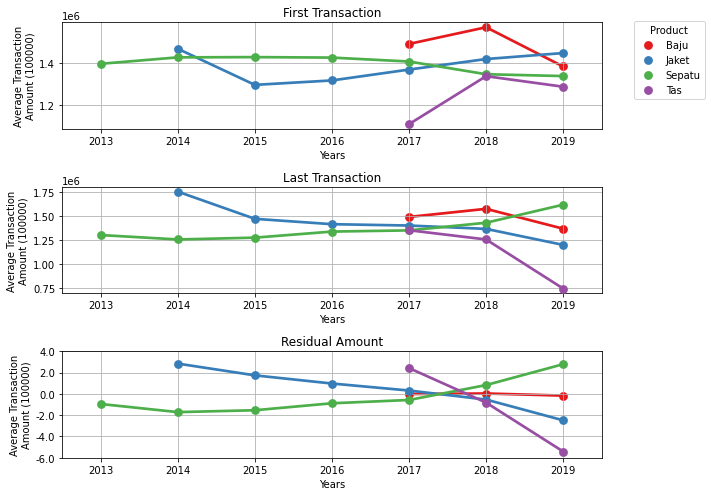

In [12]:
mean_first_transaction = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index()
mean_last_transaction = df.groupby(['Product', 'Year_Last_Transaction']).mean().reset_index()

first_year_data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index()
last_year_data = df.groupby(['Product', 'Year_Last_Transaction']).mean().reset_index()
residual_amount = last_year_data['Average_Transaction_Amount'] - first_year_data['Average_Transaction_Amount']
product_list = first_year_data['Product']
year_list = first_year_data['Year_First_Transaction']
join_data = pd.DataFrame([product_list, year_list, residual_amount], index=['Product', 'Year', 'Residual_Amount']).T

fig1, ax1 = plt.subplots(3,1, figsize=(10,7))
sns.pointplot(data = mean_first_transaction, 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product',
              palette="Set1",
              ax=ax1[0]
              )

sns.pointplot(data = mean_last_transaction, 
              x='Year_Last_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product',
              palette="Set1",
              ax=ax1[1]
              )

sns.pointplot(data = join_data, 
              x='Year', 
              y='Residual_Amount', 
              hue='Product',
              palette="Set1",
              ax=ax1[2]
              )

labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000))
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
ax1[0].legend(loc='center left', title="Product",bbox_to_anchor=(1.05, 0.65))
ax1[1].legend().remove()
ax1[2].legend().remove()

ax1[0].set_xlabel('Years')
ax1[0].set_ylabel('Average Transaction\nAmount (100000)')
ax1[0].set_title('First Transaction')

ax1[1].set_xlabel('Years')
ax1[1].set_ylabel('Average Transaction\nAmount (100000)')
ax1[1].set_title('Last Transaction')

ax1[2].set_xlabel('Years')
ax1[2].set_ylabel('Average Transaction\nAmount (100000)')
ax1[2].set_title('Residual Amount')
plt.tight_layout()
plt.show()

The residual average transaction amount between last transaction and first transaction of:

1. clothes product was decreased in 2018 to 2019, but it was increase in 2017 to 2018. 
2. jacket product was decreased in 2014 to 2019, 
3. shoes was increase in 2014 to 2019
4. bag product was decreased significantly in 2017 to 2019. 

## Identify Customers Churn

Set 'is_churn' as index

In [13]:
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
df_piv

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


In [14]:
name_product = df_piv.count().sort_values(ascending=False).head(5).index
name_product

Index(['Tas', 'Sepatu', 'Jaket', 'Baju'], dtype='object', name='Product')

In [15]:
df_piv = df_piv.reindex(columns=name_product)
df_piv

Product,Tas,Sepatu,Jaket,Baju
is_churn,,,,
False,4976,16064,11123,1268
True,7508,33090,23827,2144


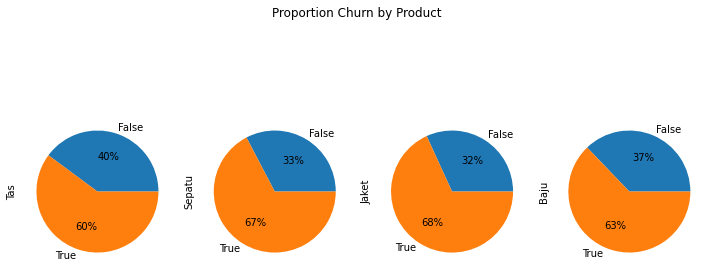

In [16]:
df_piv = df_piv.reindex(columns=name_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 5),
                autopct='%1.0f%%',
                title='Proportion Churn by Product',
                legend=None)
plt.tight_layout()
plt.show()

Based on propotion churn by product, the jacket has high percentage of churn and the shoes is following behind. It indicates, there are may be another jacket product from another competition that has good quality. It is also represented by residual amount between last transaction and firts transaction in 2017 to 2019, where the jacket product was going down to minus. Otherwise, although the churn rate of shoes product is the second higher and the residual amount of shoes product in 2013 to 2017 was minus, but this product can revoke the customers to picked this item in 2017 to 2019, where the residual amount were growing up significantly. It means, the shoes product is good demand at this market currently.

Write function to classify number of transactions

In [17]:
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7-10'
    else:
        val ='5.>10'
    return val

In [18]:
df['Count_Transaction_Group'] = df.apply(func, axis=1)
ctg_costumerid = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count().reset_index()
ctg_costumerid.head()

,Count_Transaction_Group,Customer_ID
0,1. 1,49255
1,2. 2-3,14272
2,3. 4-6,12126
3,4. 7-10,2890
4,5.>10,21457


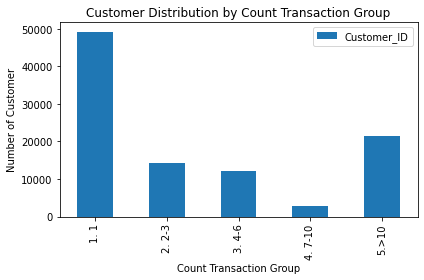

In [19]:
ctg_costumerid.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

There are 49255 customers who transaction only once, 21457 customers who transaction more than 10 times, and only 2890 customers who transaction 7-10 times.

We create the function for classify the average transaction amount

In [20]:
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

In [21]:
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018,5.>10,5. >1.000.000 - 2.500.000
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018,5.>10,5. >1.000.000 - 2.500.000
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5.>10,2. >250.000 - 500.000
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019,5.>10,3. >500.000 - 750.000
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018,5.>10,5. >1.000.000 - 2.500.000


Grouping average transaction amount by year

In [22]:
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count().reset_index()
df_year.head()

,Average_Transaction_Amount_Group,Customer_ID
0,1. 100.000 - 250.000,4912
1,2. >250.000 - 500.000,18857
2,3. >500.000 - 750.000,15171
3,4. >750.000 - 1.000.000,12298
4,5. >1.000.000 - 2.500.000,32819


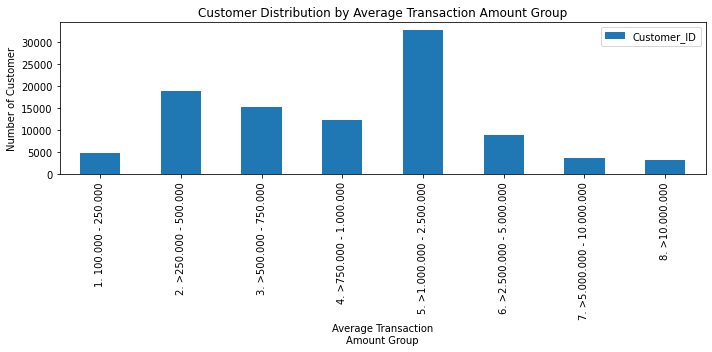

In [23]:
df_year.plot(
    x='Average_Transaction_Amount_Group',
    y='Customer_ID', 
    kind='bar', 
    title='Customer Distribution by Average Transaction Amount Group',
    figsize=(10,5)
    )
plt.xlabel('Average Transaction\nAmount Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

There are 32819 customers who transaction in range of amount 1.000.000 - 2.500.000, where this is the highe number. Only 4912 customers transaction in range of amount 100.000 - 250.000.

## Generate Model

Calculate range of year

In [24]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

In [25]:
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

In [26]:
# Features variable
X = df[feature_columns] 
# Target variable
y = df['is_churn'].astype('int64')

Split data to train and test data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression

In [28]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

calculate the confusion matrix

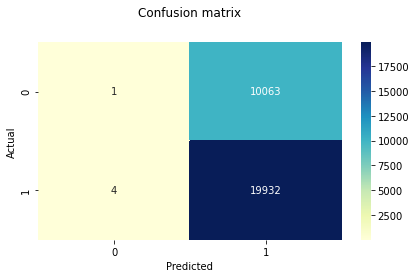

In [29]:
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [35]:
print('Number of Test Data:', len(y_test))
print('Accuracy :', accuracy_score(y_test, y_pred) * 100,'%')
print('Precision:', precision_score(y_test, y_pred) * 100,'%')
print('Recall   :', recall_score(y_test, y_pred) * 100,'%')

Number of Test Data: 30000
Accuracy : 66.44333333333333 %
Precision: 66.45107517919652 %
Recall   : 99.97993579454254 %


## Conclusions:

- Currently, the shoes product is good demand at this market. Unfortunately, the demand of other products such as jacket, bag, and clothes are going down.
- A lots of customers who transaction in range of amount less than 2.500.000.
- The problems may be can be solved by restore a good quality of jacket, bag and clothes with the cheap price, suggested price below 2 million.
- The logistic regressor model can predict the customers churn around 66.45 %. 
- By using this model from total 30.000 customers of predicted data:
    - around 19.932 customers are correct predicted to churn
    - only one customer is predicted not to churn.
    - around 10.063 customers is incorrect to predict customers churn, but actually they are not churn.
    - around 4 customers is incorrect to predict customers not to churn, bu actually they churn. 